# DAT210x - Programming with Python for DS

## Module5- Lab1

Start by importing whatever you need to import in order to make this lab work:

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%matplotlib inline

### How to Get The Dataset

1. Open up the City of Chicago's [Open Data | Crimes](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2) page.
1. In the `Primary Type` column, click on the `Menu` button next to the info button, and select `Filter This Column`. It might take a second for the filter option to show up, since it has to load the entire list first.
1. Scroll down to `GAMBLING`
1. Click the light blue `Export` button next to the `Filter` button, and select `Download As CSV`

Now that you have th dataset stored as a CSV, load it up being careful to double check headers, as per usual:

In [6]:
df = pd.read_csv('./Datasets/Crimes_2001_to_present.csv')
df.shape

(14245, 22)

Get rid of any _rows_ that have nans in them:

In [8]:
df = df.dropna(axis=0)

Display the `dtypes` of your dset:

In [9]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date, and confirm by displaying the `dtypes` again. This might be a slow executing process...

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [17]:
def doKMeans(df):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, marker='.', alpha=0.3)

    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    #
    # .. your code here ..
    df2 = df[['Longitude', 'Latitude']]


    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    # .. your code here ..
    model = KMeans(n_clusters=7).fit(df2)

    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=3, s=169)
    plt.show()

[[-87.66470815  41.77274604]
 [-87.75688168  41.89341563]
 [-87.63108338  41.69664745]
 [-87.6849773   41.98176134]
 [-87.58249315  41.75253717]
 [-87.70962079  41.87812506]
 [-87.61948454  41.80344041]]


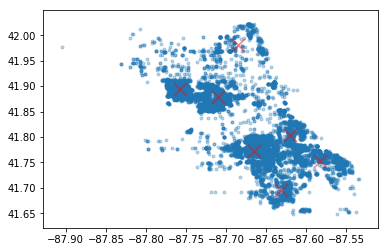

In [32]:
# Print & Plot your data
doKMeans(df)

Filter out the data so that it only contains samples that have a `Date > '2011-01-01'`, using indexing. Then, in a new figure, plot the crime incidents, as well as a new K-Means run's centroids.

(3139, 22)
[[-87.66478782  41.7755534 ]
 [-87.71062999  41.87536943]
 [-87.68651948  41.98372524]
 [-87.75477425  41.88993613]
 [-87.57999513  41.75033989]
 [-87.63454677  41.70521652]
 [-87.61888255  41.79210152]]


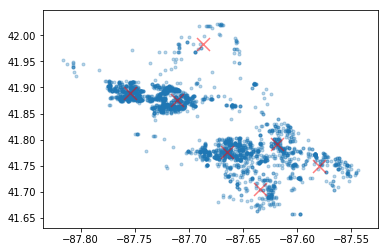

In [41]:
df3 = df[df['Date']>'2011-01-01']
print(df3.shape)
doKMeans(df3)

[[-87.61784508  41.7921526 ]
 [-87.75477425  41.88993613]
 [-87.66442558  41.77591037]
 [-87.71062999  41.87536943]
 [-87.63485385  41.7054848 ]
 [-87.68651948  41.98372524]
 [-87.57996619  41.75019768]]


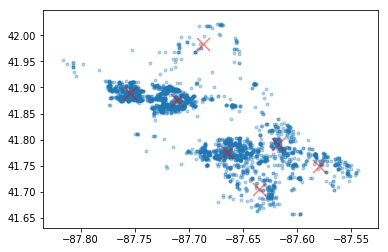

In [23]:
# Print & Plot your data
doKMeans(df3)